In [1]:
import logging
from astrodb_utils import load_astrodb, AstroDBError
from simple.utils.spectra import check_spectrum_plottable
from astrodb_utils.fits import add_missing_keywords, add_wavelength_keywords, check_header
from astropy.io import fits
import astropy.units as u
import os
import pandas as pd
import numpy as np
from specutils import Spectrum, SpectralRegion
import specutils
from specutils.manipulation import extract_region
import os

In [2]:
path = "/Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files"
print(os.path.exists(os.path.join(path,"SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt")))


True


In [ ]:
# Handle txt files first separately
file_plotted = 0
file_failed = 0
for filename in os.listdir(path):
    if filename.endswith(".fits") or filename.startswith("README"):
        # print(f"SKIPPING FITS file: {filename}")
        continue
    
    print(f"Reading text file: {filename}")

    file_path = os.path.join(path, filename)
    
    try:
        data = np.loadtxt(file_path, comments="#", encoding="latin1")

        # column1: #w         column2:flux          
        if (filename == "SDSS_J134749.74+333601.7_sdL0_SDSS_Primeval-I.txt"):
            wavelength = (data[:, 0] * u.AA).to(u.um)
            flux = data[:, 1] * (u.erg / (u.cm**2 * u.s * u.micron))

        # column1: #w (micron)         column2:flux          
        else:
            wavelength = (data[:, 0] * u.um)
            flux = data[:, 1] * (u.watt / u.micron/ (u.meter**2)) # Flux(lambda) in W/um/m2
        # check plottability
        spectrum = Spectrum1D(spectral_axis=wavelength, flux=flux)
        spectrum = extract_region(spectrum, SpectralRegion(0.4*u.um, 2.4*u.um))
        check_spectrum_plottable(spectrum, show_plot=True)
        file_plotted += 1
    
    except Exception as e:
        print(f"Could not read {filename}: {e}")
        file_failed += 1
print(f"Total files plotted: {file_plotted}")


READING FITS file: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


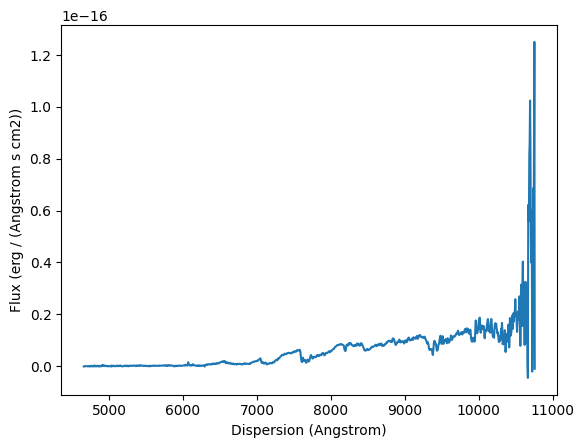

PLOTTABLE file name: ULAS_J231949.36+044559.5_M7_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


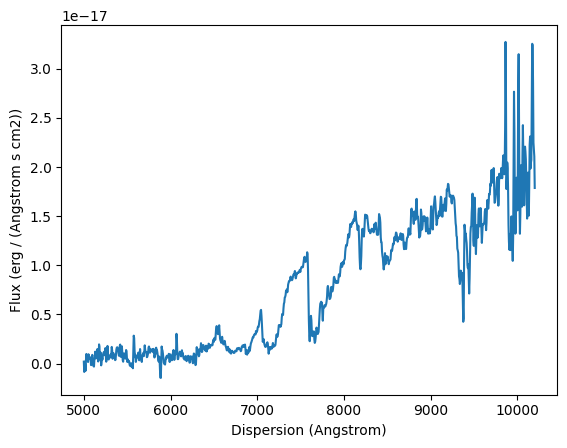

PLOTTABLE file name: ULAS_J010756.85+100811.3_sdM7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


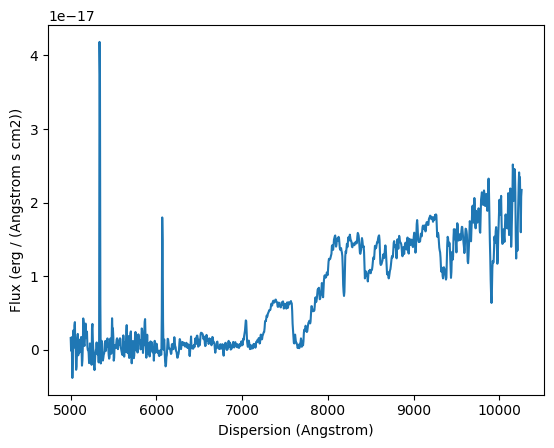

PLOTTABLE file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


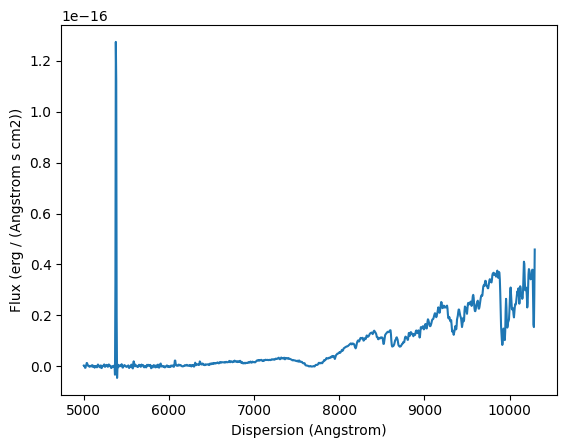

PLOTTABLE file name: ULAS_J141203.85+121609.9_sdL5_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


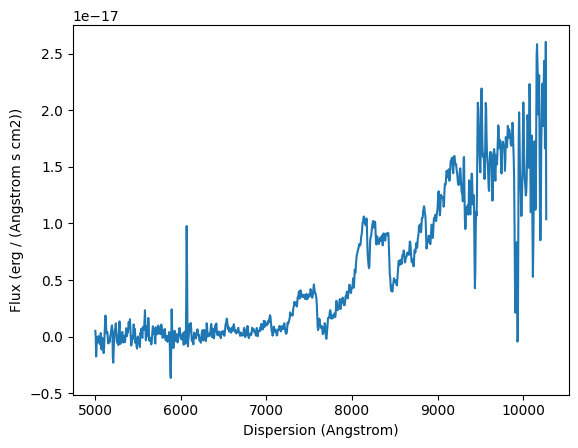

PLOTTABLE file name: ULAS_J082206.61+044101.8_sdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


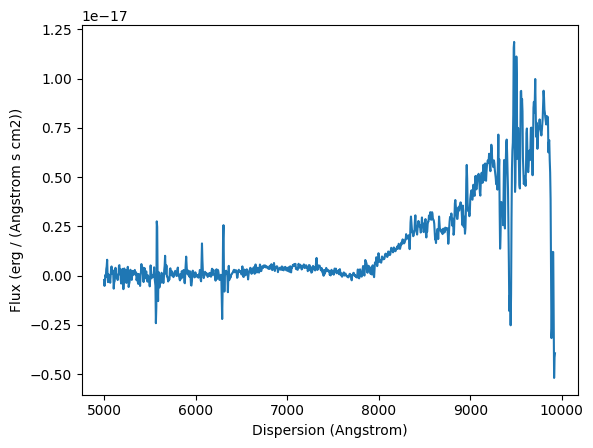

PLOTTABLE file name: ULAS_J130710.22+151103.4_sdL8_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


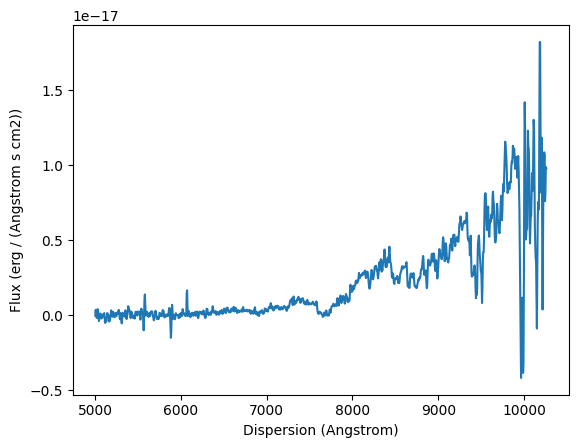

PLOTTABLE file name: ULAS_J154638.34-011213.0_sdL3_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


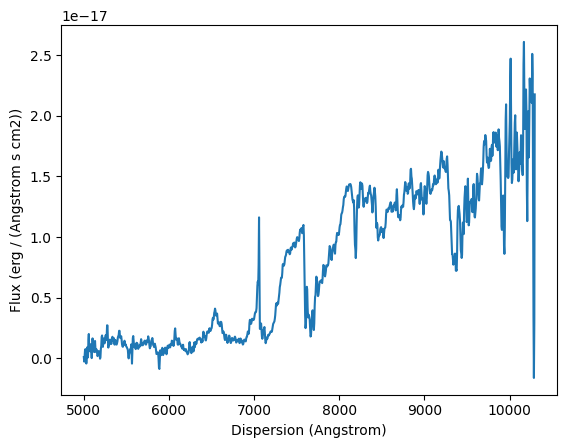

PLOTTABLE file name: ULAS_J020628.22+020255.6_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J145234.65+043738.4_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J145234.65+043738.4_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


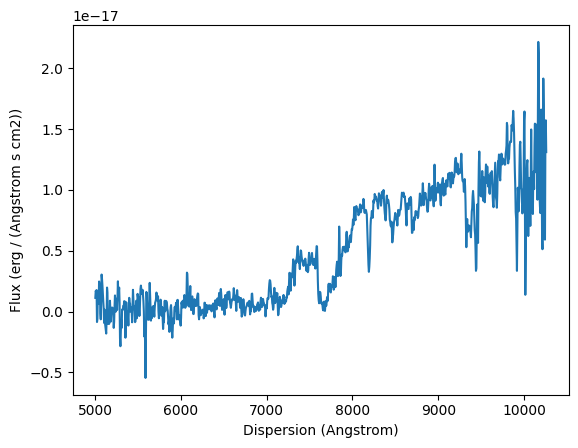

PLOTTABLE file name: ULAS_J145234.65+043738.4_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J134206.86+053724.9_sdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134206.86+053724.9_sdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


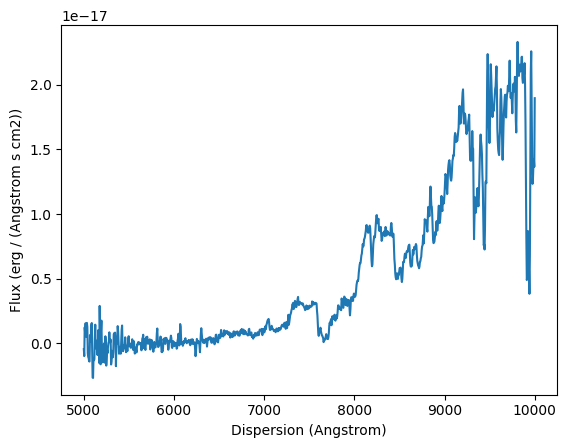

PLOTTABLE file name: ULAS_J134206.86+053724.9_sdL1_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J135216.31+312327.0_esdL0.5_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J135216.31+312327.0_esdL0.5_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


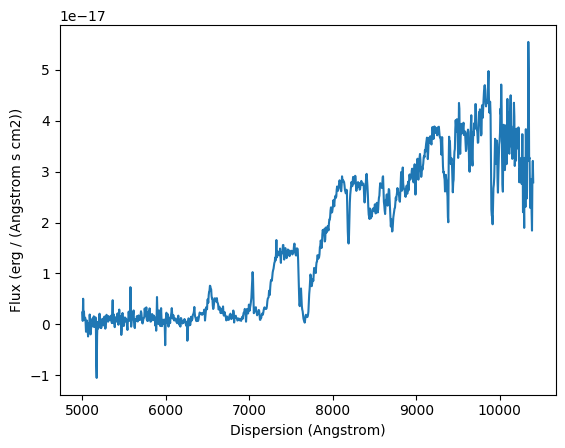

PLOTTABLE file name: ULAS_J135216.31+312327.0_esdL0.5_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J143154.18-004114.3_sdM9_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J143154.18-004114.3_sdM9_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


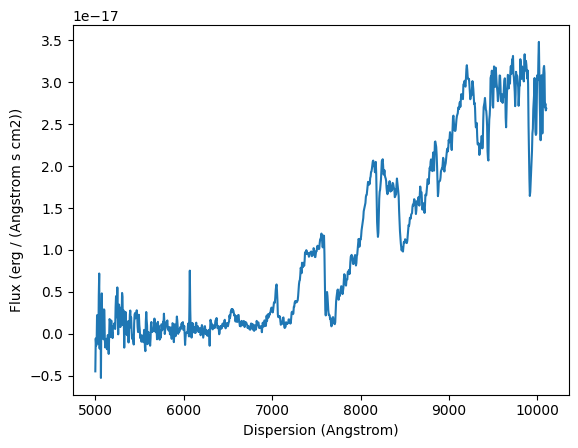

PLOTTABLE file name: ULAS_J143154.18-004114.3_sdM9_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


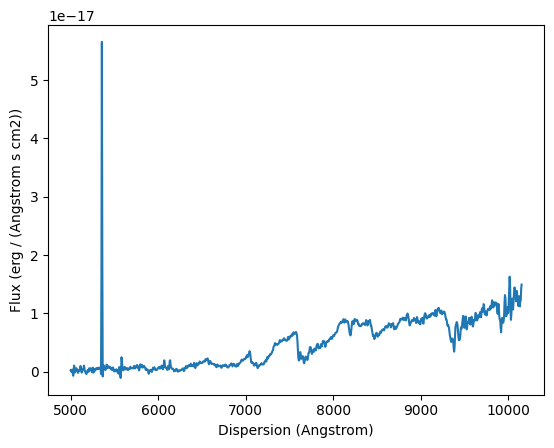

PLOTTABLE file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J223440.80+001002.6_sdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J223440.80+001002.6_sdL1_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


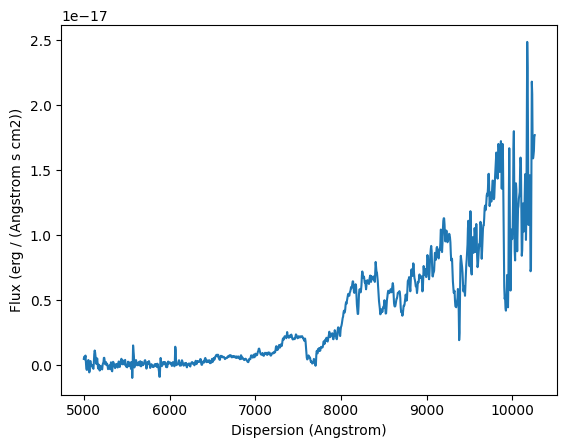

PLOTTABLE file name: ULAS_J223440.80+001002.6_sdL1_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J123142.99+015045.4_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J123142.99+015045.4_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


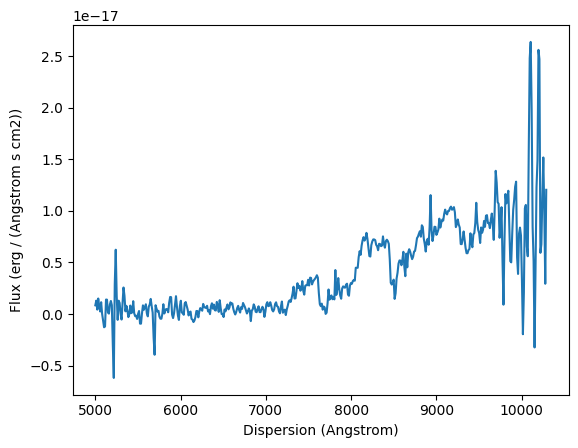

PLOTTABLE file name: ULAS_J123142.99+015045.4_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits 

READING FITS file: ULAS_J233227.03+123452.0_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J233227.03+123452.0_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


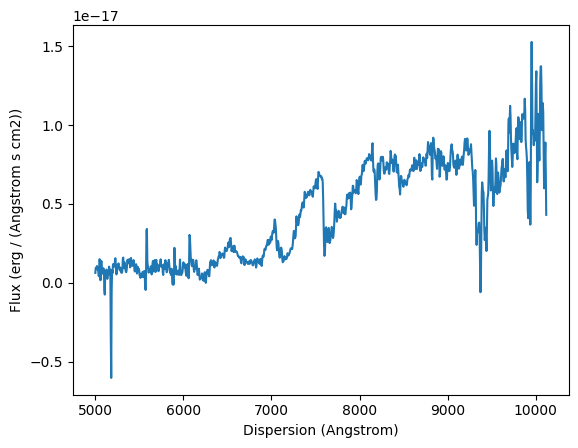

PLOTTABLE file name: ULAS_J233227.03+123452.0_M6_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


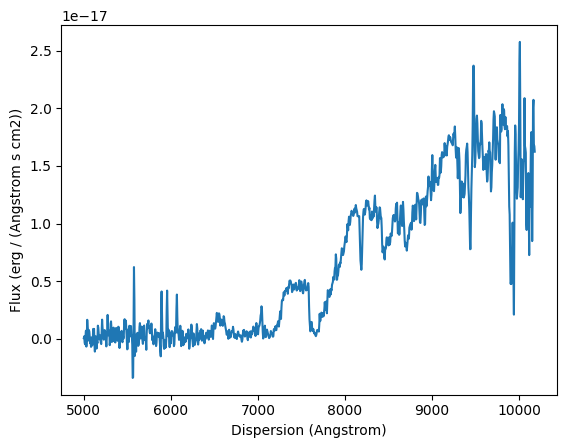

PLOTTABLE file name: ULAS_J231924.35+052524.5_esdL1_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J143517.18-014713.1_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J143517.18-014713.1_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


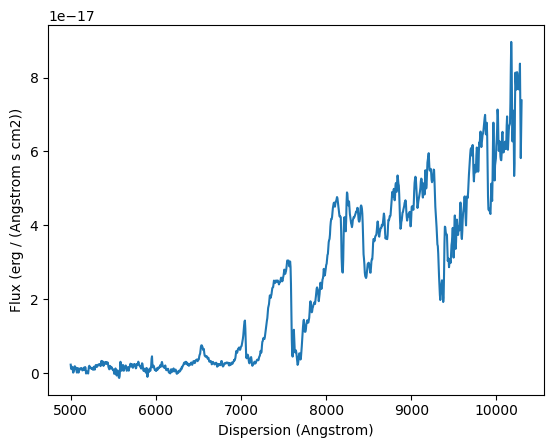

PLOTTABLE file name: ULAS_J143517.18-014713.1_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J021258.08+064115.9_sdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J021258.08+064115.9_sdL1_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


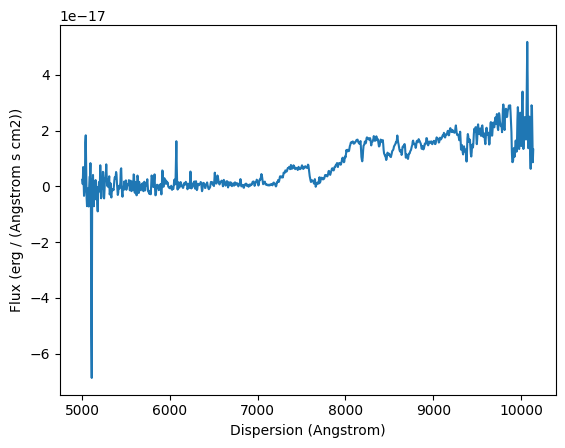

PLOTTABLE file name: ULAS_J021258.08+064115.9_sdL1_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J223123.44+010025.1_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J223123.44+010025.1_M6_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


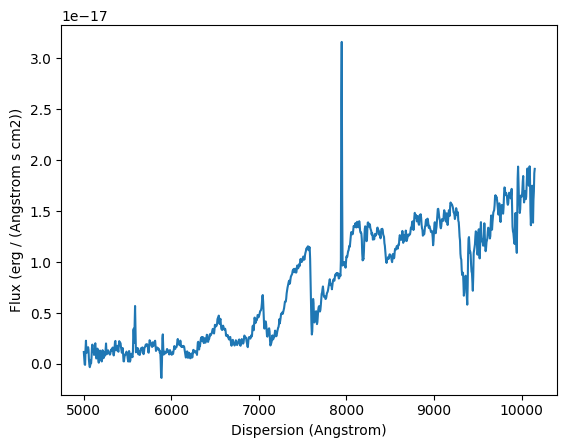

PLOTTABLE file name: ULAS_J223123.44+010025.1_M6_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J151649.84+083607.1_sdL5_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J151649.84+083607.1_sdL5_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


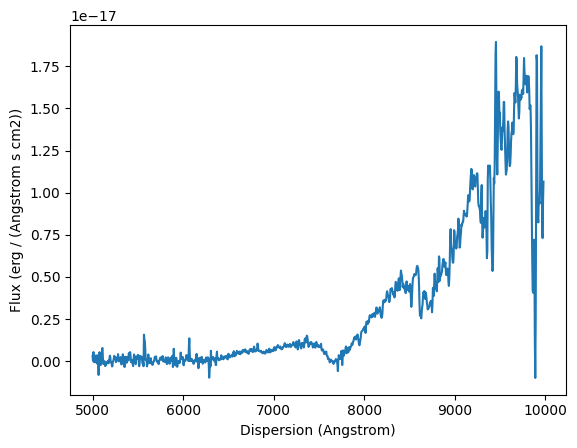

PLOTTABLE file name: ULAS_J151649.84+083607.1_sdL5_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


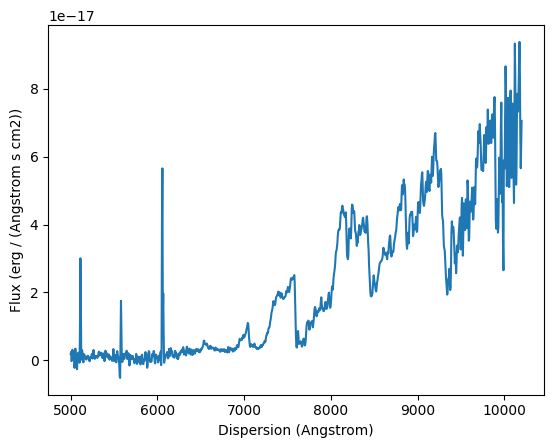

PLOTTABLE file name: ULAS_J125938.50+301500.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


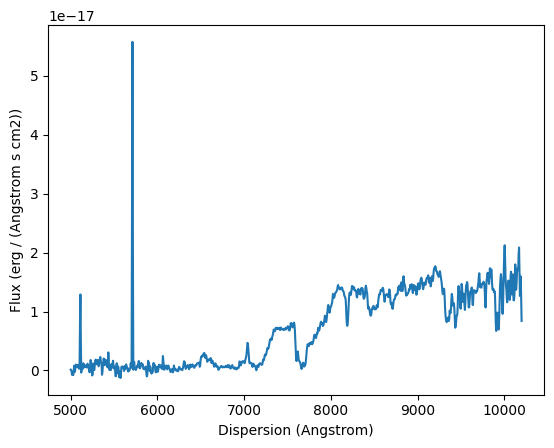

PLOTTABLE file name: ULAS_J111429.54+072809.5_esdL0_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


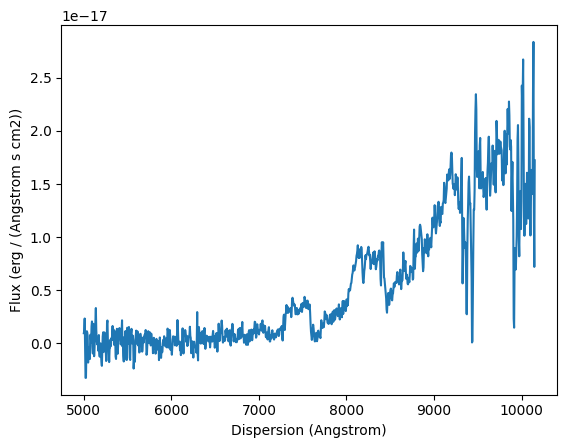

PLOTTABLE file name: ULAS_J135359.58+011856.7_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J223302.03+062030.8_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J223302.03+062030.8_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


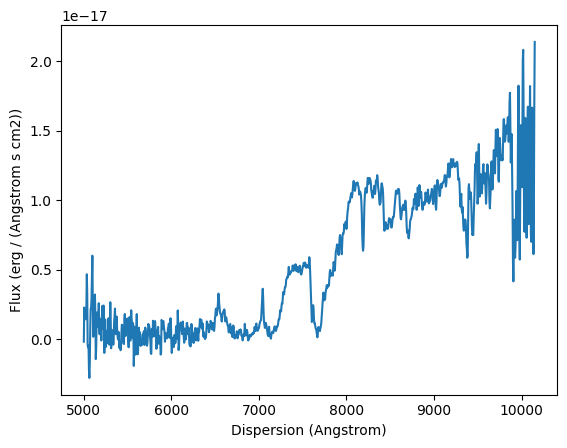

PLOTTABLE file name: ULAS_J223302.03+062030.8_esdL0.5_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J230256.53+121310.2_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J230256.53+121310.2_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


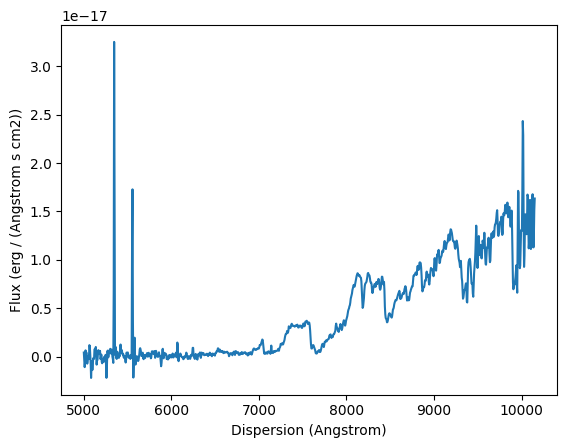

PLOTTABLE file name: ULAS_J230256.53+121310.2_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J144151.55+043738.5_sdL4_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J144151.55+043738.5_sdL4_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


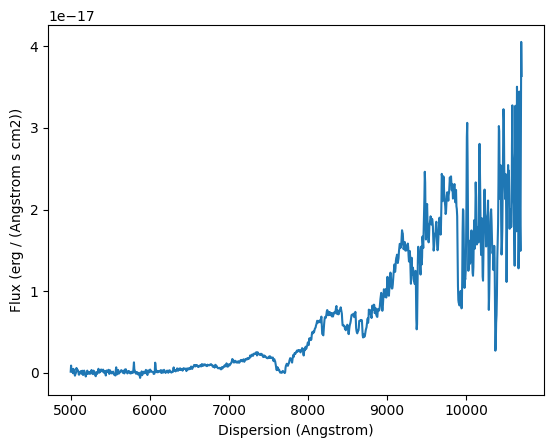

PLOTTABLE file name: ULAS_J144151.55+043738.5_sdL4_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J134852.93+101611.8_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134852.93+101611.8_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


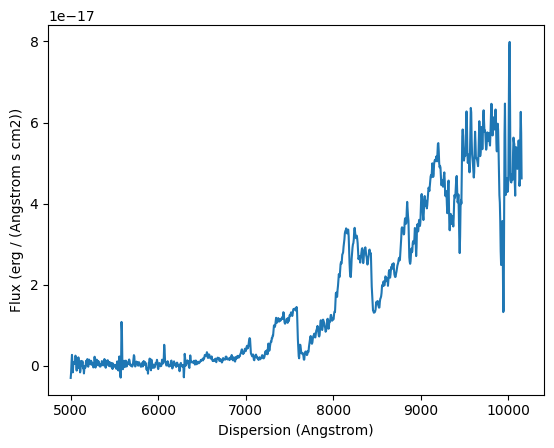

PLOTTABLE file name: ULAS_J134852.93+101611.8_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J075335.23+200622.4_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J075335.23+200622.4_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


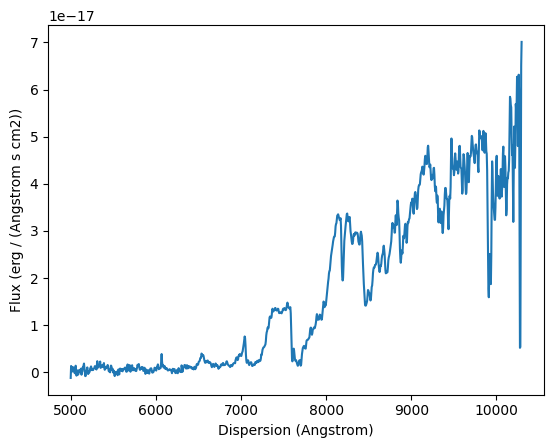

PLOTTABLE file name: ULAS_J075335.23+200622.4_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


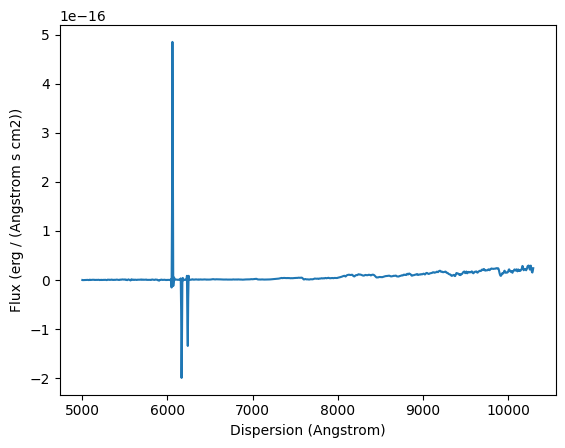

PLOTTABLE file name: ULAS_J230443.30+093423.9_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


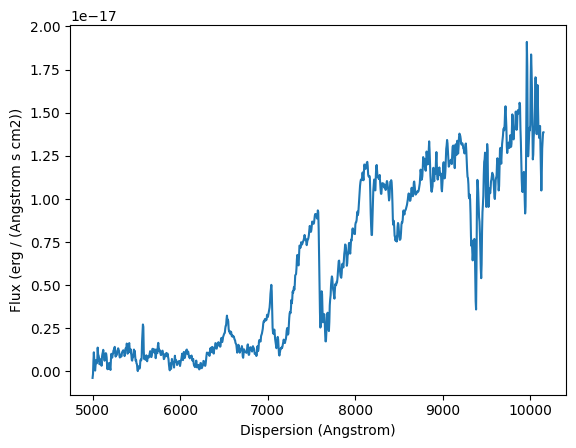

PLOTTABLE file name: ULAS_J224054.61+030902.0_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


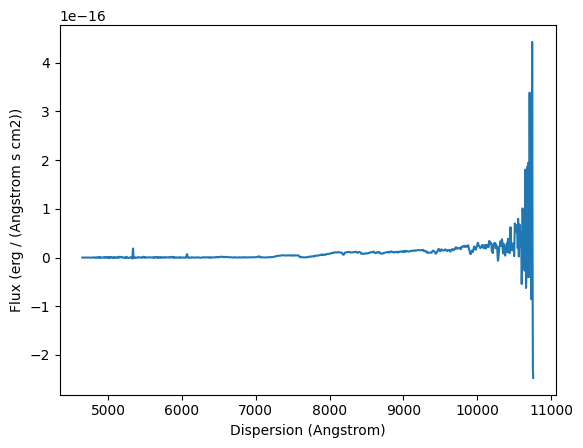

PLOTTABLE file name: ULAS_J231924.35+052524.5_esdL1_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: SDSS_J133348.24+273508.8_sdL1_OSIRIS_GTC65-13B_Primeval-I.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/SDSS_J133348.24+273508.8_sdL1_OSIRIS_GTC65-13B_Primeval-I.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


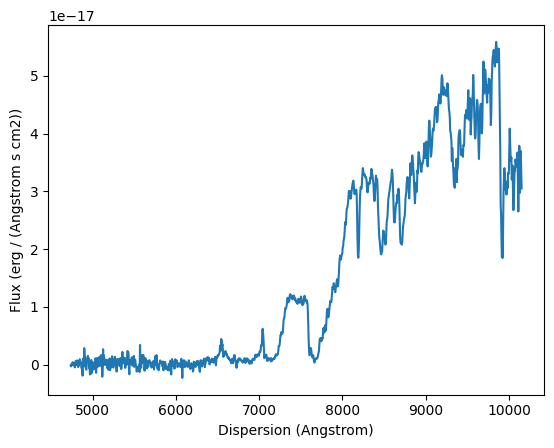

PLOTTABLE file name: SDSS_J133348.24+273508.8_sdL1_OSIRIS_GTC65-13B_Primeval-I.fits 

READING FITS file: ULAS_J001931.33+063111.0_M9_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J001931.33+063111.0_M9_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


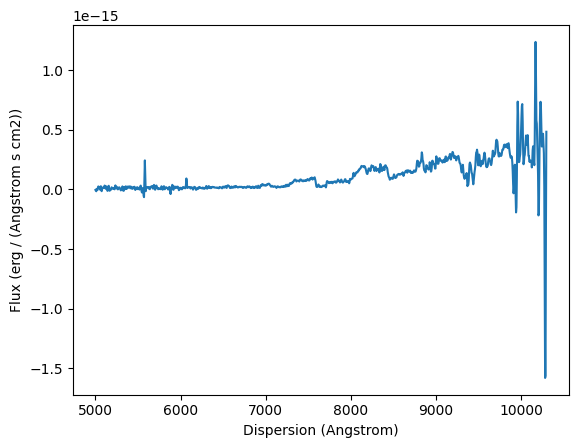

PLOTTABLE file name: ULAS_J001931.33+063111.0_M9_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


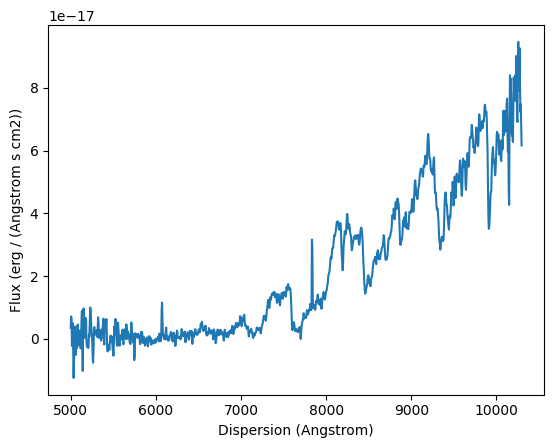

PLOTTABLE file name: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J233227.03+123452.0_L6p+T4p_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J233227.03+123452.0_L6p+T4p_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


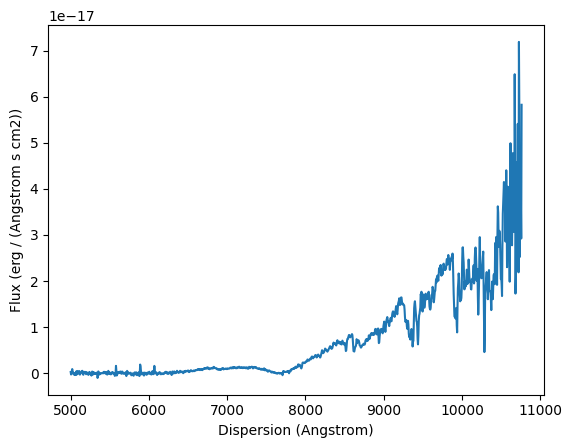

PLOTTABLE file name: ULAS_J233227.03+123452.0_L6p+T4p_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


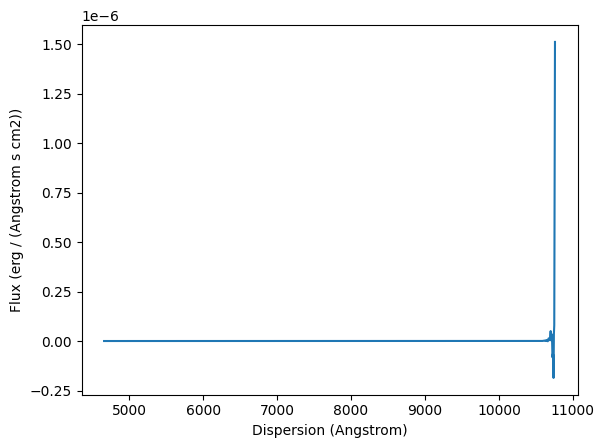

PLOTTABLE file name: ULAS_J141832.35+025323.0_sdL0_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


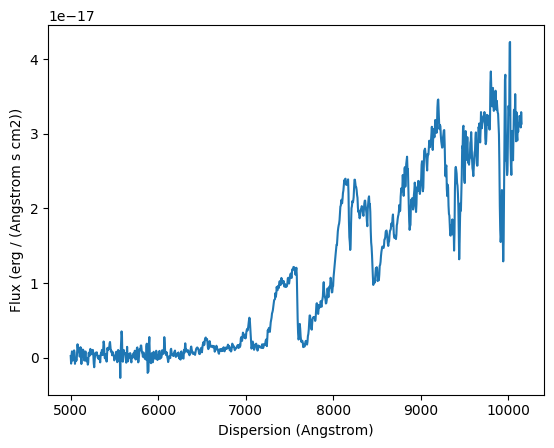

PLOTTABLE file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


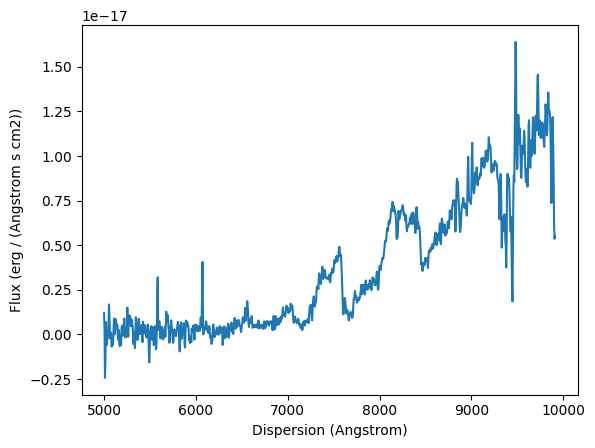

PLOTTABLE file name: ULAS_J001837.37+020015.7_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J205721.89+005628.7_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J205721.89+005628.7_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


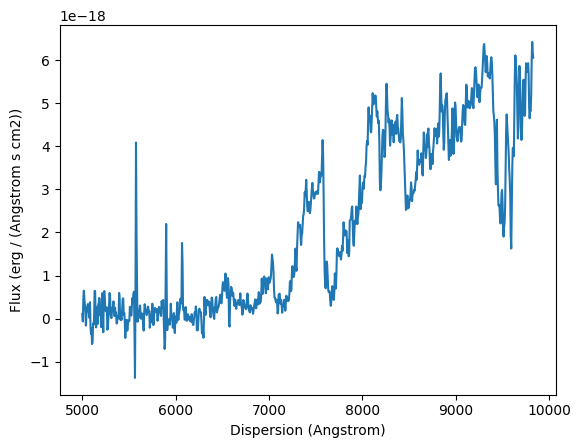

PLOTTABLE file name: ULAS_J205721.89+005628.7_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


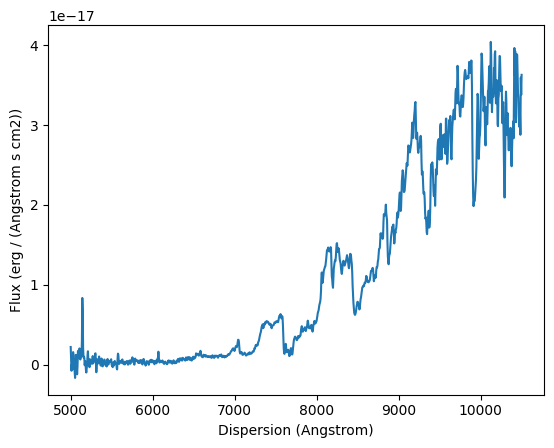

PLOTTABLE file name: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J224749.77+053207.9_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J224749.77+053207.9_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


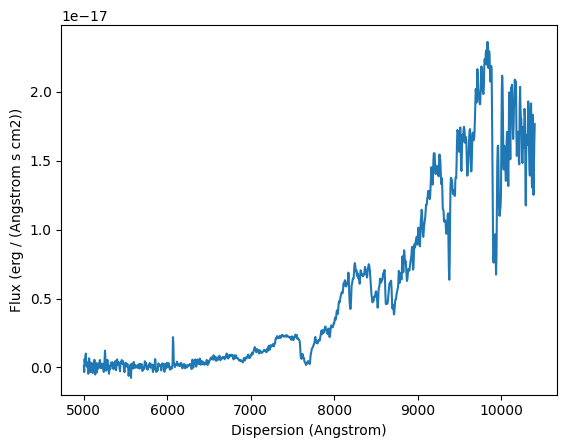

PLOTTABLE file name: ULAS_J224749.77+053207.9_M7_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J024035.36+060629.3_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J024035.36+060629.3_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


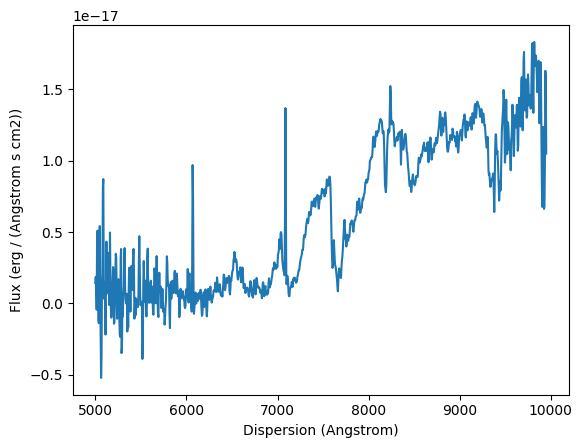

PLOTTABLE file name: ULAS_J024035.36+060629.3_sdM7_OSIRIS_GTC39-12B_Primeval-IV.fits 

READING FITS file: ULAS_J134423.98+280603.8_sdL4_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134423.98+280603.8_sdL4_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


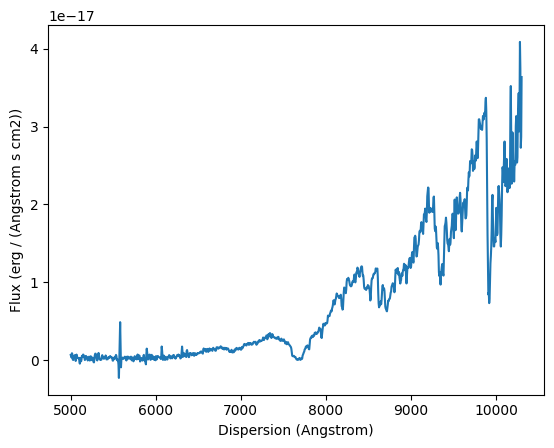

PLOTTABLE file name: ULAS_J134423.98+280603.8_sdL4_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J020858.62+020657.0_esdL3_OSIRIS_GTC63-13A_Primeval-III.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J020858.62+020657.0_esdL3_OSIRIS_GTC63-13A_Primeval-III.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


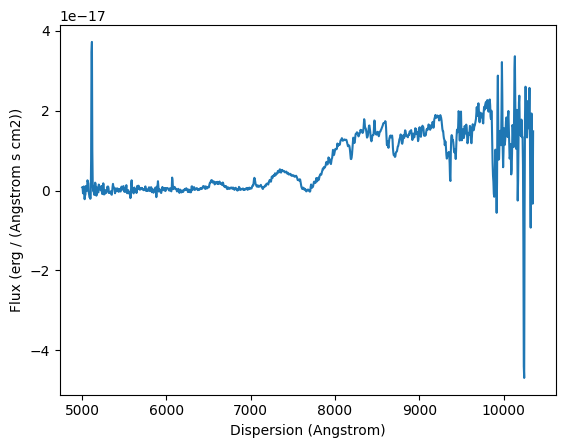

PLOTTABLE file name: ULAS_J020858.62+020657.0_esdL3_OSIRIS_GTC63-13A_Primeval-III.fits 

READING FITS file: WISEA_J001450.17-083823.4_esdL0_OSIRIS_GTC80-15A_Primeval-I.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/WISEA_J001450.17-083823.4_esdL0_OSIRIS_GTC80-15A_Primeval-I.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


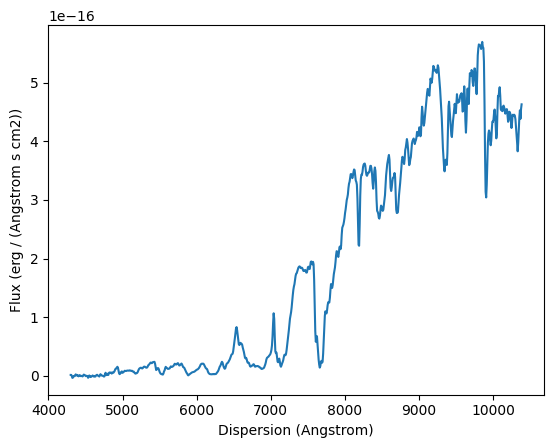

PLOTTABLE file name: WISEA_J001450.17-083823.4_esdL0_OSIRIS_GTC80-15A_Primeval-I.fits 

READING FITS file: ULAS_J004716.65+161242.4_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J004716.65+161242.4_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


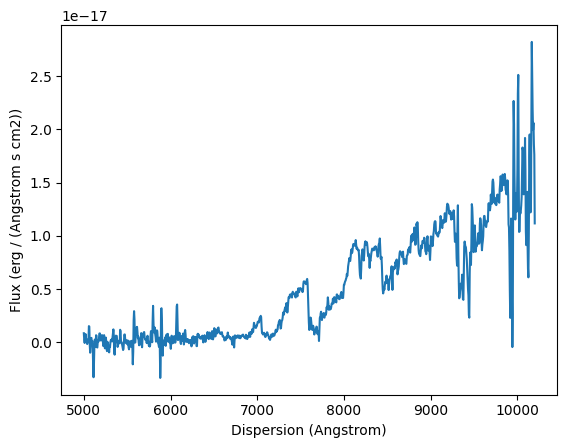

PLOTTABLE file name: ULAS_J004716.65+161242.4_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


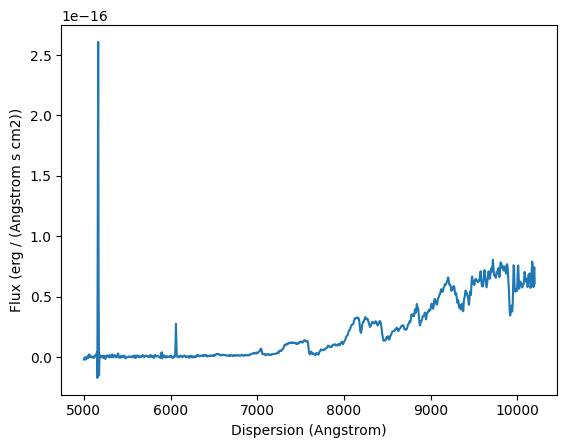

PLOTTABLE file name: ULAS_J141832.35+025323.0_sdL0_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: 2MASS_J00412179+3547133_sdL0.5_OSIRIS_GTC80-15A_Primeval-I.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/2MASS_J00412179+3547133_sdL0.5_OSIRIS_GTC80-15A_Primeval-I.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


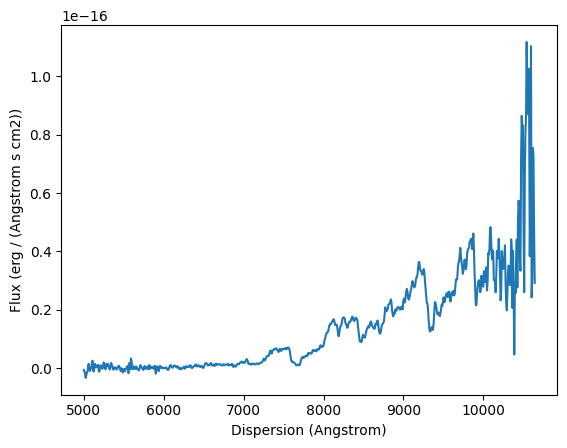

PLOTTABLE file name: 2MASS_J00412179+3547133_sdL0.5_OSIRIS_GTC80-15A_Primeval-I.fits 

READING FITS file: ULAS_J223623.17+034344.5_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J223623.17+034344.5_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


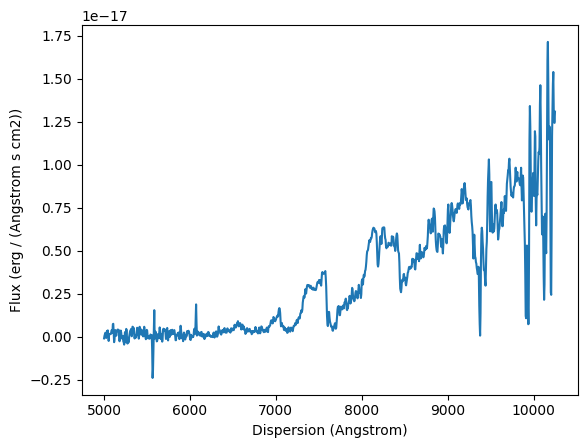

PLOTTABLE file name: ULAS_J223623.17+034344.5_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J002009.35+160451.2_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J002009.35+160451.2_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


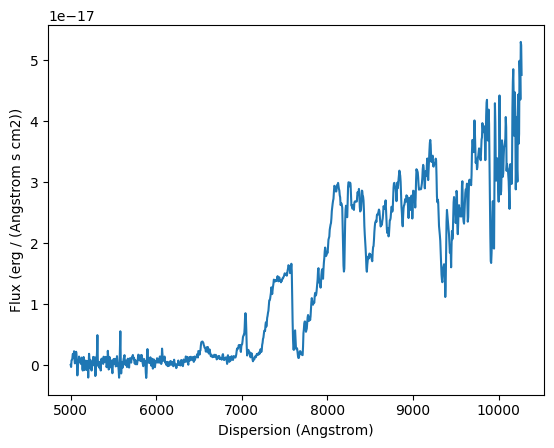

PLOTTABLE file name: ULAS_J002009.35+160451.2_sdM9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J135122.15+141914.9_esdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J135122.15+141914.9_esdM7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


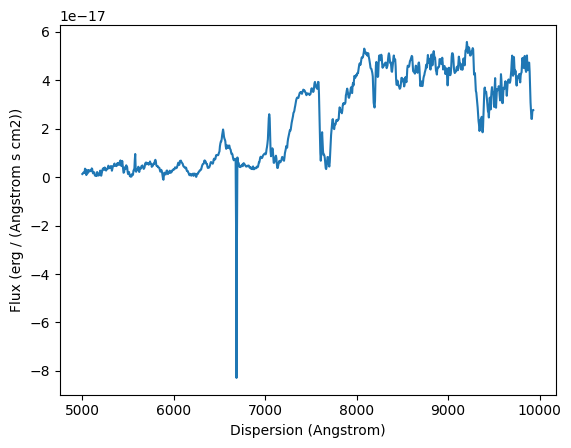

PLOTTABLE file name: ULAS_J135122.15+141914.9_esdM7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J214816.13+012225.1_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J214816.13+012225.1_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


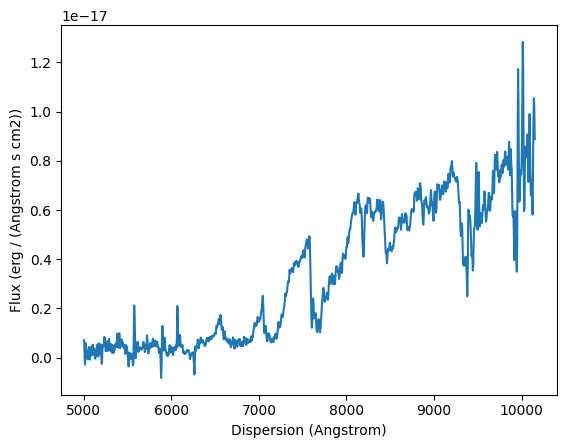

PLOTTABLE file name: ULAS_J214816.13+012225.1_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J231949.36+044559.5_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J231949.36+044559.5_M7_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


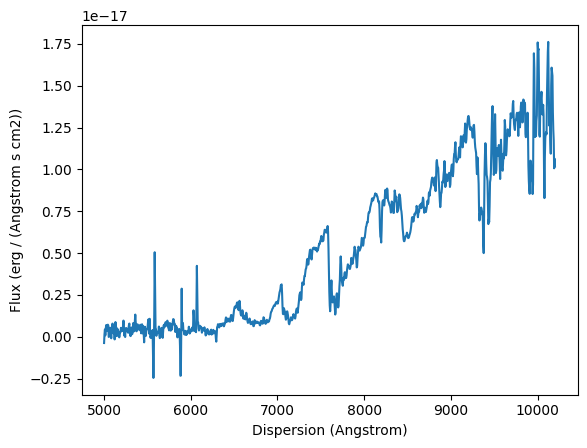

PLOTTABLE file name: ULAS_J231949.36+044559.5_M7_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


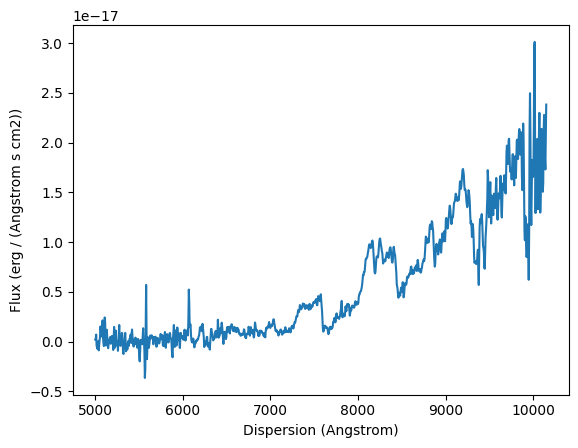

PLOTTABLE file name: ULAS_J225902.14+115602.1_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J011711.98-005213.4_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J011711.98-005213.4_M7_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


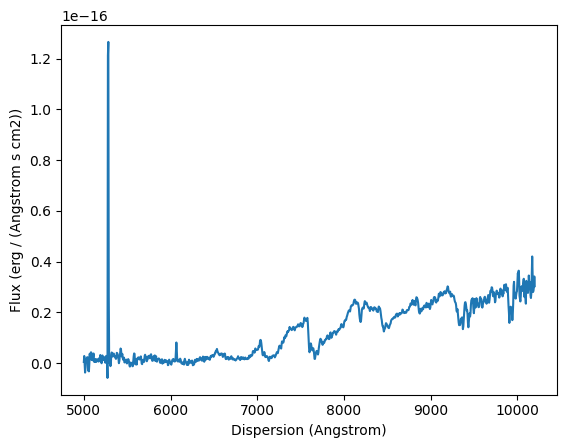

PLOTTABLE file name: ULAS_J011711.98-005213.4_M7_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC46-14A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134505.85+342441.8_M9_OSIRIS_GTC46-14A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


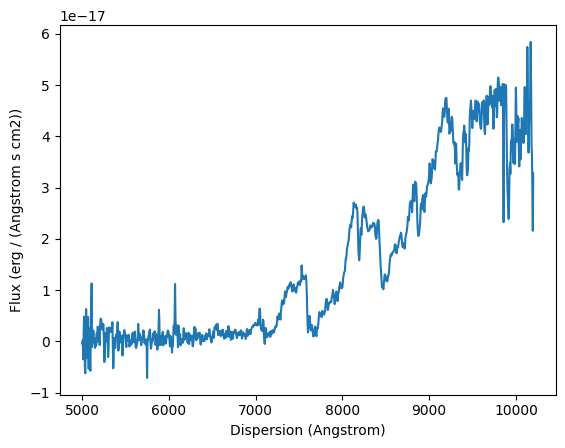

PLOTTABLE file name: ULAS_J134505.85+342441.8_M9_OSIRIS_GTC46-14A_Primeval-IV.fits 

READING FITS file: ULAS_J004602.85+091131.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J004602.85+091131.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


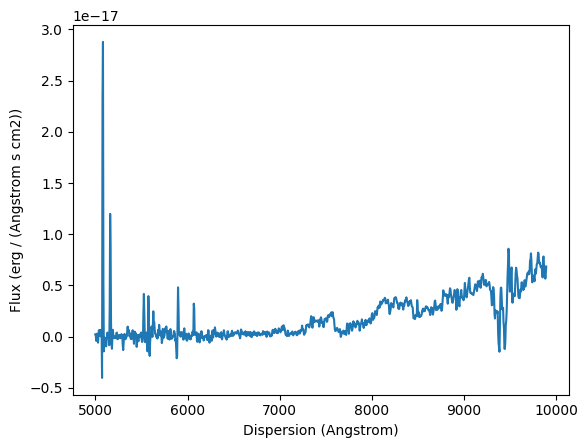

PLOTTABLE file name: ULAS_J004602.85+091131.2_M9_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J134505.85+342441.8_M9_comb_OSIRIS_scombine_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J134505.85+342441.8_M9_comb_OSIRIS_scombine_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


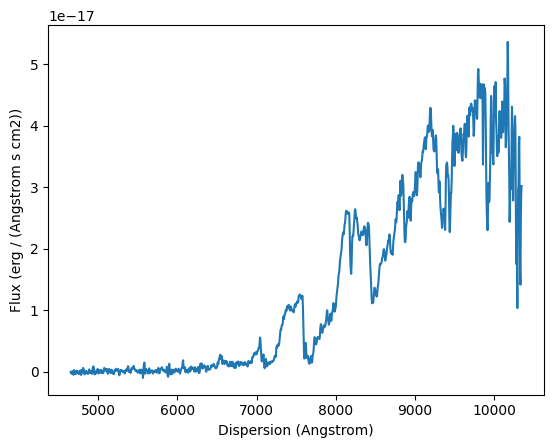

PLOTTABLE file name: ULAS_J134505.85+342441.8_M9_comb_OSIRIS_scombine_Primeval-IV.fits 

READING FITS file: ULAS_J023803.12+054526.1_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J023803.12+054526.1_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


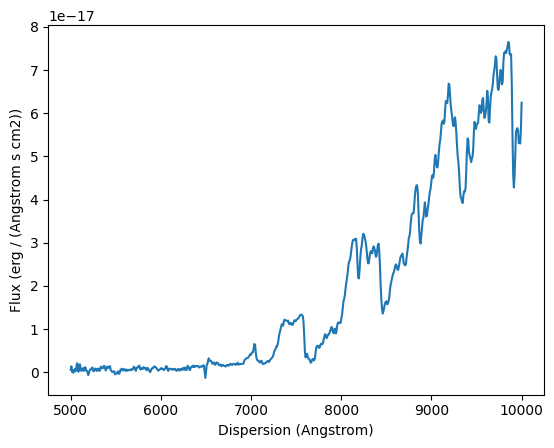

PLOTTABLE file name: ULAS_J023803.12+054526.1_sdL0_OSIRIS_GTC80-15A_Primeval-IV.fits 

READING FITS file: ULAS_J230711.01+014447.1_usdL4.5_OSIRIS_GTC63-13A_Primeval-III.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J230711.01+014447.1_usdL4.5_OSIRIS_GTC63-13A_Primeval-III.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


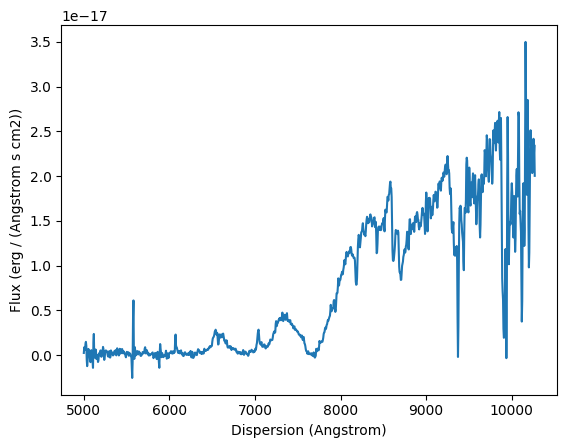

PLOTTABLE file name: ULAS_J230711.01+014447.1_usdL4.5_OSIRIS_GTC63-13A_Primeval-III.fits 

READING FITS file: ULAS_J125226.62+092920.1_sdL0.5_OSIRIS_GTC80-15A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J125226.62+092920.1_sdL0.5_OSIRIS_GTC80-15A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


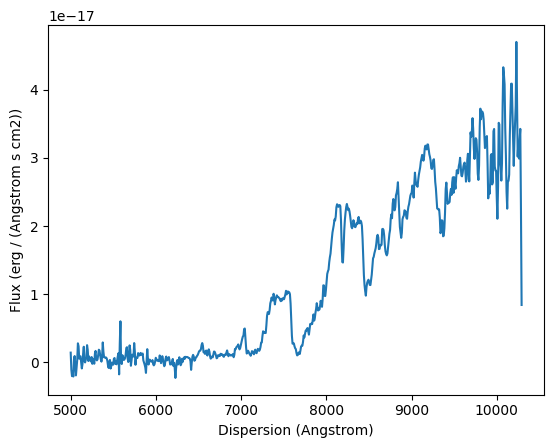

PLOTTABLE file name: ULAS_J125226.62+092920.1_sdL0.5_OSIRIS_GTC80-15A_Primeval-IV.fits 

READING FITS file: ULAS_J011840.73+084424.7_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J011840.73+084424.7_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


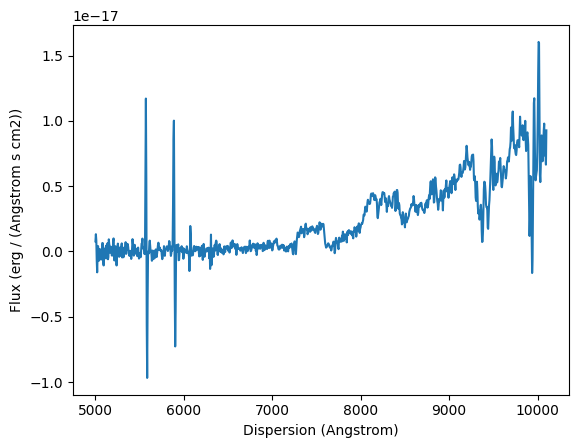

PLOTTABLE file name: ULAS_J011840.73+084424.7_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 

READING FITS file: ULAS_J124104.75-000531.4_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
File path: /Users/kelle/Hunter College Dropbox/Kelle Cruz/SIMPLE/SIMPLE-db/scripts/ingests/Zhang18/sty2054_supplemental_files/ULAS_J124104.75-000531.4_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits
flux unit: erg / (Angstrom s cm2)
flux unit: power density/spectral flux density wav, wave unit: Angstrom


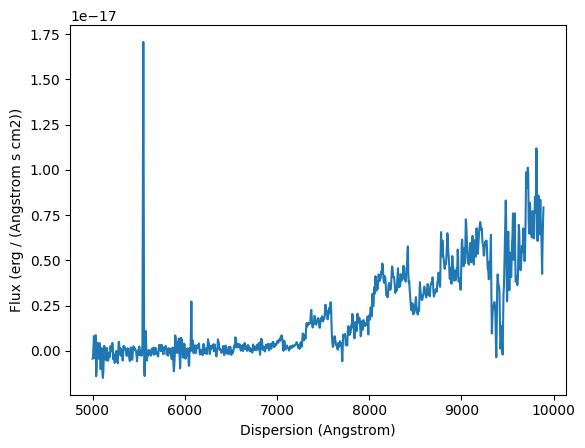

PLOTTABLE file name: ULAS_J124104.75-000531.4_sdL0_OSIRIS_GTC63-13A_Primeval-IV.fits 


Total files read into Spectrum objects: 64
Total files plotted: 64
Total files failed: 0


In [4]:
# KELLES CODE
# Only do OSIRIS FITS files

file_read = 0
file_plotted = 0
file_failed = 0

for filename in os.listdir(path):
    if not filename.endswith("fits") or "OSIRIS" not in filename:
        #print(f"SKIPPING FITS file: {filename}")
        continue
    else:
        print(f"READING FITS file: {filename}")
    
    file_path = os.path.join(path, filename)
    print(f"File path: {file_path}")

    # Read the FITS file
    #with fits.open(file_path, mode="update") as filehandle:
    #    unit_string =  "erg / (angstrom s cm2)"
    #    print(f"REPLACING {filehandle[0].header['BUNIT']} with {unit_string}")
    #    filehandle[0].header["BUNIT"] = unit_string

    try:
        spectrum = Spectrum.read(file_path, format="wcs1d-fits") #, flux_unit=u.Unit("erg / (angstrom s cm2)"))
        print(f"flux unit: {spectrum.flux.unit}")
        #if u.get_physical_type(spectrum.flux.unit) == "unknown": 
        #    spectrum.flux = spectrum.flux * u.Unit("erg / (angstrom s cm2)")  # Convert flux to erg/cm^2/s/A
        print(f"flux unit: {u.get_physical_type(spectrum.flux.unit)}, wave unit: {spectrum.spectral_axis.unit}")
        file_read +=1
    except Exception as e:
        file_failed += 1
        raise e

    # Plot and check
    try:
        check_spectrum_plottable(spectrum, raise_error=True, show_plot=True)
        print(f"PLOTTABLE file name: {filename} \n")
        file_plotted += 1
    except Exception as e:
        file_failed += 1
        raise e


    
    # except Exception as e:
    #     if "flux units are not expected" in str(e):
           
    #         if check_spectrum_plottable(spectrum, raise_error=True, show_plot=False):
    #             print(f"PLOTTABLE file name: {filename} \n")
    #             file_plotted += 1
    #         else:
    #             print(f"{e}")
    #             print(f"WCS SKIPPING {file_path}. \n")
    #             file_failed += 1
    #             continue
    #     else:
    #         print(f"{e}")
    #         print(f"SKIPPING {file_path}. \n")
    #         raise e
        #print(f"Error reading {filename}: {e}")
        #print(f"Header info: {header}")
        
print(f"\nTotal files read into Spectrum objects: {file_read}")
print(f"Total files plotted: {file_plotted}")
print(f"Total files failed: {file_failed}")

